In [354]:
#Importing the needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [355]:
#Reading the file

df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
df

Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       Coverage Education Effective To Date EmploymentStatus Gender  ...  \
0         Basic   College           2/18/11         Employed      M  ...   
1         Basic   College           1/18/11       Unemployed      F  ...   
2         Basic  Bachelor           2/10/11         Employed      M  ...   
3      Extended   College           1/11/11         Employed      M  ...   
4       Premium  Bachelor           1/17/11    Medical Leave      F  ...   
...         ...       ...               ...              ...    ...  ...   
10905   Premium  Bachelor           1/19/11       Unemployed      F  ...   
10906     Basic   College            1/6/11         Employed      F  ...   
10907  Extended  Bachelor            2/6/11         Employed      F  ...   
10908   Premium   College           2/13/11         Employed      F  ...   
10909     Basic  Bachelor            1/8/11       Unemployed      M  ...   

       Number of Open Complaints Number of Policies     Policy Type  \
0                            0.0                  9  Corporate Auto   
1                            0.0                  1   Personal Auto   
2                            0.0                  2   Personal Auto   
3                            0.0                  2  Corporate Auto   
4                            NaN                  7   Personal Auto   
...                          ...                ...             ...   
10905                        NaN                  7   Personal Auto   
10906                        0.0                  6   Personal Auto   
10907                        0.0                  2  Corporate Auto   
10908                        4.0                  6   Personal Auto   
10909                        0.0                  3   Personal Auto   

             Policy  Renew Offer Type  Sales Channel  Total Claim Amount  \
0      Corporate L3            Offer3          Agent          292.800000   
1       Personal L3            Offer4    Call Center          744.924331   
2       Personal L3            Offer3    Call Center          480.000000   
3      Corporate L3            Offer2         Branch          484.013411   
4       Personal L2            Offer1         Branch          707.925645   
...             ...               ...            ...                 ...   
10905   Personal L1            Offer3            Web         1214.400000   
10906   Personal L3            Offer2         Branch          273.018929   
10907  Corporate L3            Offer1            Web          381.306996   
10908   Personal L1            Offer1         Branch          618.288849   
10909   Personal L1            Offer4            Web         1021.719397   

       Vehicle Class Vehicle Size Vehicle Type  
0      Four-Door Car      Medsize          NaN  
1      Four-Door Car      Medsize          NaN  
2                SUV      Medsize            A  
3      Four-Door Car      Medsize            A  
4      Four-Door Car      Medsize          NaN  
...              ...          ...          ...  
10905     Luxury Car      Medsize            A  
10906  Four-Door Car   

In [356]:
#Dealing with the data



In [357]:
#Showing the dataframe shape

print(df.shape)

(10910, 26)


In [358]:
# Standardizing header names.
df.columns=df.columns.str.replace(' ','_') 
df.columns = df.columns.str.lower()
df = df.rename(columns={'employmentstatus':'employment_status'})



In [359]:
#The columns that are numerical:

df.select_dtypes(include=np.number).columns.tolist()


['unnamed:_0',
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [360]:
#The columns that are categorical:

df.select_dtypes(include=object).columns.tolist()

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [361]:
#Checking the NaN values

count = df.isna().sum()
count


unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [362]:
#Replacing the NaN values with "0" for the numeric columns

numeric_columns = df.select_dtypes(include=['number']).columns

# fill -1 to all NaN 
df[numeric_columns] = df[numeric_columns].fillna(0)

In [363]:
#Checking for `NaN` values after replacing the numerical with "0"
df.isna().sum()

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [364]:
#Storing the months from the dataset in a separate column.

df['month_effective_to_date'] =  pd.to_datetime(df['effective_to_date']).dt.strftime('%B')
df  

unnamed:_0 customer       state  customer_lifetime_value response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       coverage education effective_to_date employment_status gender  ...  \
0         Basic   College           2/18/11          Employed      M  ...   
1         Basic   College           1/18/11        Unemployed      F  ...   
2         Basic  Bachelor           2/10/11          Employed      M  ...   
3      Extended   College           1/11/11          Employed      M  ...   
4       Premium  Bachelor           1/17/11     Medical Leave      F  ...   
...         ...       ...               ...               ...    ...  ...   
10905   Premium  Bachelor           1/19/11        Unemployed      F  ...   
10906     Basic   College            1/6/11          Employed      F  ...   
10907  Extended  Bachelor            2/6/11          Employed      F  ...   
10908   Premium   College           2/13/11          Employed      F  ...   
10909     Basic  Bachelor            1/8/11        Unemployed      M  ...   

       number_of_policies     policy_type        policy  renew_offer_type  \
0                       9  Corporate Auto  Corporate L3            Offer3   
1                       1   Personal Auto   Personal L3            Offer4   
2                       2   Personal Auto   Personal L3            Offer3   
3                       2  Corporate Auto  Corporate L3            Offer2   
4                       7   Personal Auto   Personal L2            Offer1   
...                   ...             ...           ...               ...   
10905                   7   Personal Auto   Personal L1            Offer3   
10906                   6   Personal Auto   Personal L3            Offer2   
10907                   2  Corporate Auto  Corporate L3            Offer1   
10908                   6   Personal Auto   Personal L1            Offer1   
10909                   3   Personal Auto   Personal L1            Offer4   

       sales_channel  total_claim_amount  vehicle_class  vehicle_size  \
0              Agent          292.800000  Four-Door Car       Medsize   
1        Call Center          744.924331  Four-Door Car       Medsize   
2        Call Center          480.000000            SUV       Medsize   
3             Branch          484.013411  Four-Door Car       Medsize   
4             Branch          707.925645  Four-Door Car       Medsize   
...              ...                 ...            ...           ...   
10905            Web         1214.400000     Luxury Car       Medsize   
10906         Branch          273.018929  Four-Door Car       Medsize   
10907            Web          381.306996     Luxury SUV       Medsize   
10908         Branch          618.288849            SUV       Medsize   
10909            Web         1021.719397            SUV       Medsize   

      vehicle_type month_effective_to_date  
0              NaN                February  
1              NaN                 January  
2                A                February  
3                A                 January  
4              NaN                 January  
...            ...                     ...  
10905            A                 January  
10906  

In [365]:
#Exploring the data


In [366]:
#Showing DataFrame info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10279 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employment_status              10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [367]:
#Describing DataFrame

df.describe()

unnamed:_0  customer_lifetime_value        income  \
count  10910.000000             10910.000000  10910.000000   
mean    5454.500000              8018.241094  37536.284785   
std     3149.590053              6885.081434  30359.195670   
min        0.000000              1898.007675      0.000000   
25%     2727.250000              4014.453113      0.000000   
50%     5454.500000              5771.147235  33813.500000   
75%     8181.750000              8992.779137  62250.750000   
max    10909.000000             83325.381190  99981.000000   

       monthly_premium_auto  months_since_last_claim  \
count          10910.000000             10910.000000   
mean              93.196059                14.270119   
std               34.442532                10.404862   
min               61.000000                 0.000000   
25%               68.000000                 5.000000   
50%               83.000000                13.000000   
75%              109.000000                23.000000   
max              298.000000                35.000000   

       months_since_policy_inception  number_of_open_complaints  \
count                   10910.000000               10910.000000   
mean                       48.091934                   0.361962   
std                        27.940675                   0.890134   
min                         0.000000                   0.000000   
25%                        24.000000                   0.000000   
50%                        48.000000                   0.000000   
75%                        71.000000                   0.000000   
max                        99.000000                   5.000000   

       number_of_policies  total_claim_amount  
count        10910.000000        10910.000000  
mean             2.979193          434.888330  
std              2.399359          292.180556  
min              1.000000            0.099007  
25%              1.000000          271.082527  
50%              2.000000          382.564630  
75%              4.000000          547.200000  
max              9.000000         2893.239678

In [368]:
df.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type', 'month_effective_to_date'],
      dtype='object')

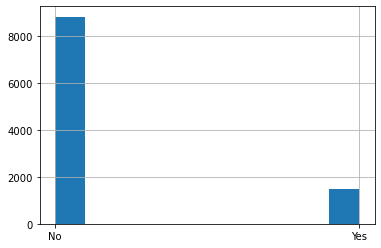

In [369]:
#Showing a plot of the total number of responses.

df["response"].hist()
plt.show()

<AxesSubplot:xlabel='sales_channel', ylabel='Percent'>

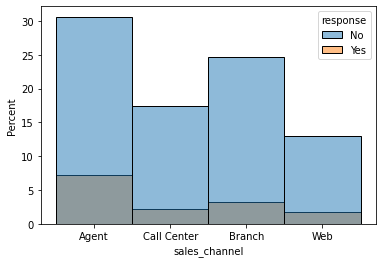

In [370]:
#Showing a plot of the response rate by the sales channel.

sns.histplot(data=df, x='sales_channel', hue='response', stat="percent") 


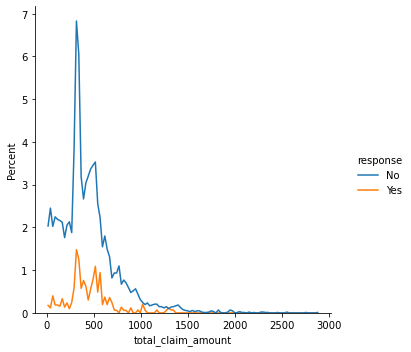

In [371]:
#Showing a plot of the response rate by the total claim amount

sns.displot(
    data=df, x="total_claim_amount", hue="response",
    kind="hist", stat="percent", element="poly", fill=False
)

<AxesSubplot:xlabel='income', ylabel='Percent'>

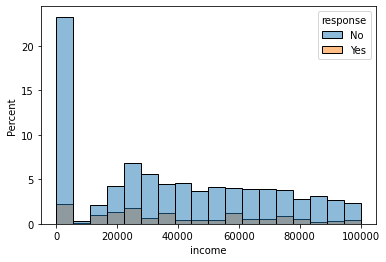

In [372]:
#Show a plot of the response rate by income

sns.histplot(data=df, x='income', hue='response', stat= "percent" )

In [373]:
#Processing Data

In [374]:
#X-y split.

In [375]:
# x explanatory features/variables,y target vector

# x =  explanatory features/variables, y = target vector

numerical_df = df.select_dtypes(include=[np.number])
numerical_df


x = numerical_df.iloc[:,[2,3,4,5,7,8]]
x


income  monthly_premium_auto  months_since_last_claim  \
0       48029                    61                      7.0   
1           0                    64                      3.0   
2       22139                   100                     34.0   
3       49078                    97                     10.0   
4       23675                   117                      0.0   
...       ...                   ...                      ...   
10905       0                   253                      0.0   
10906   61146                    65                      7.0   
10907   39837                   201                     11.0   
10908   64195                   158                      0.0   
10909       0                   101                     31.0   

       months_since_policy_inception  number_of_policies  total_claim_amount  
0                                 52                   9          292.800000  
1                                 26                   1          744.924331  
2                                 31                   2          480.000000  
3                                  3                   2          484.013411  
4                                 31                   7          707.925645  
...                              ...                 ...                 ...  
10905                             40                   7         1214.400000  
10906                             68                   6          273.018929  
10907                             63                   2          381.306996  
10908                             27                   6          618.288849  
10909                              1                   3         1021.719397  

[10910 rows x 6 columns]

In [376]:
y = numerical_df.iloc[:, 1]
y

0         4809.216960
1         2228.525238
2        14947.917300
3        22332.439460
4         9025.067525
             ...     
10905    15563.369440
10906     5259.444853
10907    23893.304100
10908    11971.977650
10909     6857.519928
Name: customer_lifetime_value, Length: 10910, dtype: float64

In [377]:
#Normalizing numerical values

In [378]:
#numerical_df = df.select_dtypes(include=[np.number])
#numerical_df

In [379]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_df)
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis =0))


[ 4.16817004e-17 -1.42629568e-16  4.94970192e-17  1.04855527e-16
 -6.18712740e-17  1.10717017e-16  5.27534020e-17  5.73123380e-17
  3.06099987e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [380]:
#One Hot/Label Encoding (categorical).

In [381]:
# Dummyfication
x = pd.get_dummies(x) 
x

income  monthly_premium_auto  months_since_last_claim  \
0       48029                    61                      7.0   
1           0                    64                      3.0   
2       22139                   100                     34.0   
3       49078                    97                     10.0   
4       23675                   117                      0.0   
...       ...                   ...                      ...   
10905       0                   253                      0.0   
10906   61146                    65                      7.0   
10907   39837                   201                     11.0   
10908   64195                   158                      0.0   
10909       0                   101                     31.0   

       months_since_policy_inception  number_of_policies  total_claim_amount  
0                                 52                   9          292.800000  
1                                 26                   1          744.924331  
2                                 31                   2          480.000000  
3                                  3                   2          484.013411  
4                                 31                   7          707.925645  
...                              ...                 ...                 ...  
10905                             40                   7         1214.400000  
10906                             68                   6          273.018929  
10907                             63                   2          381.306996  
10908                             27                   6          618.288849  
10909                              1                   3         1021.719397  

[10910 rows x 6 columns]

In [382]:
#Train/Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state = 0)
x_train


income  monthly_premium_auto  months_since_last_claim  \
8721        0                    95                     13.0   
5989        0                    64                      0.0   
9398    74454                    71                     25.0   
10591   44388                   113                     10.0   
4247    51593                    80                      5.0   
...       ...                   ...                      ...   
4859    66446                   136                      8.0   
3264        0                    87                      3.0   
9845    21708                    68                      0.0   
10799   99180                   106                     15.0   
2732    31056                    63                      5.0   

       months_since_policy_inception  number_of_policies  total_claim_amount  
8721                              20                   5          456.000000  
5989                              71                   6          307.200000  
9398                              29                   3          340.800000  
10591                             74                   1          496.843023  
4247                              91                   2          202.905809  
...                              ...                 ...                 ...  
4859                              77                   3          639.464548  
3264                              43                   1          132.492438  
9845                              77                   2          326.400000  
10799                             20                   3           33.751887  
2732                              46                   1          302.400000  

[8182 rows x 6 columns]

In [383]:
print("Nb of rows of x_train = {}".format(len(x_train)))
print("Nb of rows of x_test = {}".format(len(x_test)))
print("Nb of rows of = {}".format(len(y_train)))
print("Nb of rows of y_test = {}".format(len(y_test)))

Nb of rows of x_train = 8182
Nb of rows of x_test = 2728
Nb of rows of = 8182
Nb of rows of y_test = 2728


In [384]:
# fit and transform train data
sc_x = StandardScaler()

In [385]:
x_train = sc_x.fit_transform(x_train)
x_test =  sc_x.transform(x_test)

In [386]:
#Creating a model with sklearn

In [387]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [388]:
reg.fit(x_train, y_train) 


LinearRegression()

In [389]:
reg.coef_

array([ 161.98103638, 2750.61619898,  125.42512258,   19.87831617,
        185.65521028, -137.44106568])

In [390]:
predictions_train = reg.predict(x_train)

In [391]:
#Model Validation

In [392]:
#MSE(Mean Squared Error)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,predictions_train)

38655300.26596436

In [393]:
predictions_test = reg.predict(x_test)

In [394]:
mean_squared_error(y_test,predictions_test)

42486422.201657206

In [395]:
#R2(R-Squared)

from sklearn.metrics import r2_score
display(r2_score(y_train,predictions_train))
r2_score(y_test,predictions_test)

0.15664769044374538

0.18420306067445358

In [396]:
#RMSE(Root Mean Squared Error)

rmse_test = mean_squared_error(y_test,predictions_test,squared = False)
rmse_test

6518.160952420338

In [397]:
rmse_train = mean_squared_error(y_train,predictions_train,squared = False)
rmse_train

6217.338680332958

In [398]:
#MAE(Mean Absolute Error)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,predictions_train)

3890.527933264247

In [399]:
mean_absolute_error(y_test,predictions_test)

3948.428764513082